## Take Home Challenge #2

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
import os

In [2]:
users = pd.read_csv('takehome_user_engagement.csv')
users.head()

,time_stamp,user_id,visited
0,2014-04-22 03:53:30,1,1
1,2013-11-15 03:45:04,2,1
2,2013-11-29 03:45:04,2,1
3,2013-12-09 03:45:04,2,1
4,2013-12-25 03:45:04,2,1


In [3]:
df = pd.read_csv('takehome_users.csv',encoding = 'latin')
df.head()

,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1.398139e+09,1,0,11,10803.0
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0
2,3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,1.363735e+09,0,0,94,1525.0
3,4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,1.369210e+09,0,0,1,5151.0
4,5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,1.358850e+09,0,0,193,5240.0


In [4]:
df.describe()

,object_id,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id
count,12000.00000,8.823000e+03,12000.000000,12000.000000,12000.000000,6417.000000
mean,6000.50000,1.379279e+09,0.249500,0.149333,141.884583,5962.957145
std,3464.24595,1.953116e+07,0.432742,0.356432,124.056723,3383.761968
min,1.00000,1.338452e+09,0.000000,0.000000,0.000000,3.000000
25%,3000.75000,1.363195e+09,0.000000,0.000000,29.000000,3058.000000
50%,6000.50000,1.382888e+09,0.000000,0.000000,108.000000,5954.000000
75%,9000.25000,1.398443e+09,0.000000,0.000000,238.250000,8817.000000
max,12000.00000,1.402067e+09,1.000000,1.000000,416.000000,11999.000000


In [5]:
df.info() #null values are in last_session_creation_time and invited_by_user_id

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12000 entries, 0 to 11999
Data columns (total 10 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   object_id                   12000 non-null  int64  
 1   creation_time               12000 non-null  object 
 2   name                        12000 non-null  object 
 3   email                       12000 non-null  object 
 4   creation_source             12000 non-null  object 
 5   last_session_creation_time  8823 non-null   float64
 6   opted_in_to_mailing_list    12000 non-null  int64  
 7   enabled_for_marketing_drip  12000 non-null  int64  
 8   org_id                      12000 non-null  int64  
 9   invited_by_user_id          6417 non-null   float64
dtypes: float64(2), int64(4), object(4)
memory usage: 937.6+ KB


In [6]:
users.time_stamp = pd.to_datetime(users.time_stamp)
users = users.set_index('time_stamp', drop= True)

In [7]:
from datetime import timedelta

def adopted_users(x):    
    "takes a users input and returns whether or not they have been active within any 7-day period"
    df_temp = users.loc[users['user_id'] == x] #select out rows of this user
    df_temp = df_temp.resample('D').mean().dropna() #resample to show if active in a day. .mean() is just of 1
    adopted = 0
    for i in range(len(df_temp)-2): #loop over active days till the second to last day
        if df_temp.index[i + 2] - df_temp.index[i] <= timedelta(days=7): # difference between every 1st and 3rd day
            adopted = 1
            break
        else:
            adopted = 0
    return adopted

In [8]:
df['adopted_user'] = df['object_id'].apply(adopted_users)

(array([0, 1, 2, 3, 4]),
 [Text(0, 0, 'GUEST_INVITE'),
  Text(1, 0, 'ORG_INVITE'),
  Text(2, 0, 'SIGNUP'),
  Text(3, 0, 'PERSONAL_PROJECTS'),
  Text(4, 0, 'SIGNUP_GOOGLE_AUTH')])

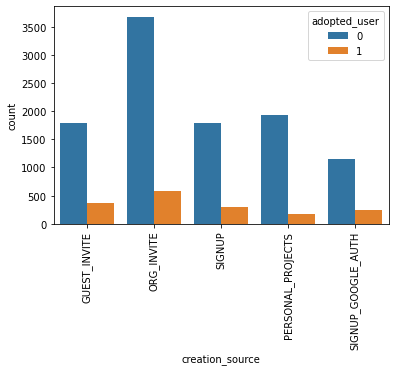

In [9]:
sns.countplot(x='creation_source', data=df, hue='adopted_user')
plt.xticks(rotation=90)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12000 entries, 0 to 11999
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   object_id                   12000 non-null  int64  
 1   creation_time               12000 non-null  object 
 2   name                        12000 non-null  object 
 3   email                       12000 non-null  object 
 4   creation_source             12000 non-null  object 
 5   last_session_creation_time  8823 non-null   float64
 6   opted_in_to_mailing_list    12000 non-null  int64  
 7   enabled_for_marketing_drip  12000 non-null  int64  
 8   org_id                      12000 non-null  int64  
 9   invited_by_user_id          6417 non-null   float64
 10  adopted_user                12000 non-null  int64  
dtypes: float64(2), int64(5), object(4)
memory usage: 1.0+ MB


In [11]:
df['creation_time']=pd.to_datetime(df['creation_time'],format='%Y-%m-%d', errors='coerce')
df['ct_Month']=df['creation_time'].apply(lambda x : x.month)
df['ct_Month'].value_counts()

5     1455
3     1177
4     1169
1     1029
11     936
2      934
12     930
10     924
9      901
7      852
8      852
6      841
Name: ct_Month, dtype: int64

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12000 entries, 0 to 11999
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   object_id                   12000 non-null  int64         
 1   creation_time               12000 non-null  datetime64[ns]
 2   name                        12000 non-null  object        
 3   email                       12000 non-null  object        
 4   creation_source             12000 non-null  object        
 5   last_session_creation_time  8823 non-null   float64       
 6   opted_in_to_mailing_list    12000 non-null  int64         
 7   enabled_for_marketing_drip  12000 non-null  int64         
 8   org_id                      12000 non-null  int64         
 9   invited_by_user_id          6417 non-null   float64       
 10  adopted_user                12000 non-null  int64         
 11  ct_Month                    12000 non-null  int64     

In [13]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
creation_labels = encoder.fit_transform(df['creation_source'])
df.creation_source = creation_labels

name_labels = encoder.fit_transform(df['name'])
df.name = name_labels

email_labels = encoder.fit_transform(df['email'])
df.email = email_labels


In [14]:
df.head()

,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,adopted_user,ct_Month
0,1,2014-04-22 03:53:30,2087,1047,0,1.398139e+09,1,0,11,10803.0,0,4
1,2,2013-11-15 03:45:04,8488,7290,1,1.396238e+09,0,0,1,316.0,1,11
2,3,2013-03-19 23:14:52,1259,7681,1,1.363735e+09,0,0,94,1525.0,0,3
3,4,2013-05-21 08:09:28,2099,7971,0,1.369210e+09,0,0,1,5151.0,0,5
4,5,2013-01-17 10:14:20,8708,3718,0,1.358850e+09,0,0,193,5240.0,0,1


In [15]:
df.drop(['creation_time','last_session_creation_time','invited_by_user_id'], axis=1, inplace=True)

In [16]:
df

,object_id,name,email,creation_source,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,adopted_user,ct_Month
0,1,2087,1047,0,1,0,11,0,4
1,2,8488,7290,1,0,0,1,1,11
2,3,1259,7681,1,0,0,94,0,3
3,4,2099,7971,0,0,0,1,0,5
4,5,8708,3718,0,0,0,193,0,1
...,...,...,...,...,...,...,...,...,...
11995,11996,7156,9573,1,0,0,89,0,9
11996,11997,3521,535,4,0,0,200,0,1
11997,11998,4598,4322,0,1,1,83,0,4
11998,11999,3261,11341,2,0,0,6,0,5


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12000 entries, 0 to 11999
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   object_id                   12000 non-null  int64
 1   name                        12000 non-null  int64
 2   email                       12000 non-null  int64
 3   creation_source             12000 non-null  int64
 4   opted_in_to_mailing_list    12000 non-null  int64
 5   enabled_for_marketing_drip  12000 non-null  int64
 6   org_id                      12000 non-null  int64
 7   adopted_user                12000 non-null  int64
 8   ct_Month                    12000 non-null  int64
dtypes: int64(9)
memory usage: 843.9 KB


In [23]:
from sklearn.model_selection import train_test_split

#set up data by seperating out the labels, then split for cross validation
X = df.drop('adopted_user',axis=1)
y = df['adopted_user']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25,random_state=1)

[[2561    3]
 [ 436    0]]
0.8536666666666667
              precision    recall  f1-score   support

           0       0.85      1.00      0.92      2564
           1       0.00      0.00      0.00       436

    accuracy                           0.85      3000
   macro avg       0.43      0.50      0.46      3000
weighted avg       0.73      0.85      0.79      3000



[Text(0.5, 1.0, 'Confusion Matrx of a Random Classifier Model')]

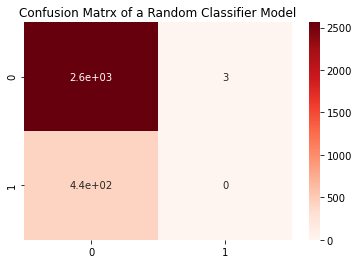

In [25]:
#Random Forrest Classifier
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import f1_score
from sklearn.metrics import auc
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(n_estimators=100, random_state = 1,n_jobs=-1)
model_res = rfc.fit(X_train, y_train)
predictions_rfc = model_res.predict(X_test)
print(confusion_matrix(y_test, predictions_rfc))
print(accuracy_score(y_test, predictions_rfc))
print(classification_report(y_test, predictions_rfc))

sns.heatmap(confusion_matrix(y_test, predictions_rfc),annot=True,cmap ="Reds").set(title='Confusion Matrx of a Random Classifier Model')

[[2563    1]
 [ 436    0]]
              precision    recall  f1-score   support

           0       0.85      1.00      0.92      2564
           1       0.00      0.00      0.00       436

    accuracy                           0.85      3000
   macro avg       0.43      0.50      0.46      3000
weighted avg       0.73      0.85      0.79      3000



[Text(0.5, 1.0, 'Confusion Matrx of a Gradient Boosting Model')]

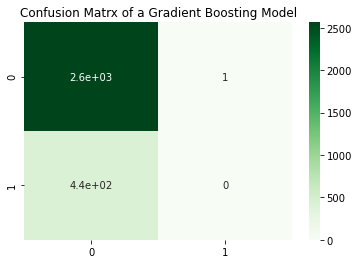

In [26]:
#Gradient Boosting
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
gb = GradientBoostingClassifier(n_estimators = 20, random_state = 0)
gb.fit(X_train, y_train)
predictions_gb = gb.predict(X_test)

print(confusion_matrix(y_test, predictions_gb))
print(classification_report(y_test, predictions_gb))

sns.heatmap(confusion_matrix(y_test, predictions_gb),annot=True,cmap ="Greens").set(title='Confusion Matrx of a Gradient Boosting Model')

In [35]:
features = pd.Series(gb.feature_importances_, index=X.columns)

<AxesSubplot:>

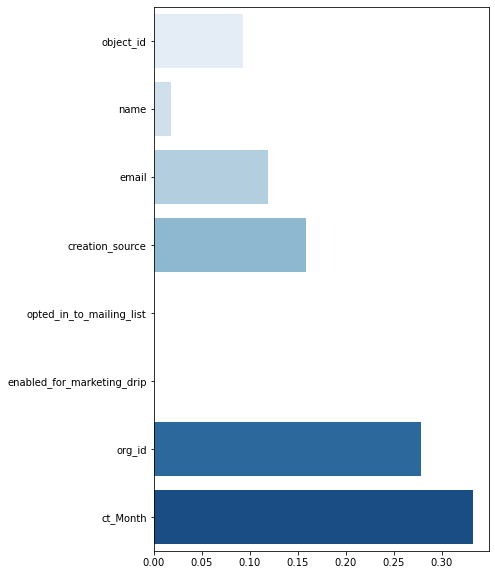

In [38]:
plt.figure(figsize=(6,10))
sns.barplot(y=X.columns, x=gb.feature_importances_, palette='Blues')
# month in which the the users joined and org id in which they were invited are important features